<a href="https://colab.research.google.com/github/jerramirez1/proyectornt/blob/main/ProyectoRNT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ruta = '/content/drive/MyDrive/ProyectoRNT/Registro_Nacional_de_Turismo_-_RNT_20251016.csv'
data = pd.read_csv(ruta)

/tmp/ipython-input-628669289.py:2: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(ruta)


In [4]:
data

,CODIGO_RNT,ESTADO_RNT,RAZON_SOCIAL_ESTABLECIMIENTO,DEPARTAMENTO,CODIGO_DEPARTAMENTO,MUNICIPIO,CODIGO_MUNICIPIO,NIT,CATEGORIA,SUB_CATEGORIA,NUMERO_DE_HABITACIONES,NUMERO_DE_CAMAS,NUMERO_DE_EMPLEADOS,AÑO
0,11,ACTIVO,BCD TRAVEL OFICINA PRINCIPAL,BOGOTA,11,BOGOTA D.C.,11001,"800,078,692",AGENCIA DE VIAJES,AGENCIAS DE VIAJES Y DE TURISMO,0,0,367,2019
1,20,ACTIVO,LUBEL.COM,BOGOTA,11,BOGOTA D.C.,11001,"860,501,706",OFICINAS DE REPRESENTACION TURÍSTICA,OFICINA DE REPRESENTACION TURÍSTICA,0,0,3,2019
2,43,ACTIVO,HOTEL LOS BALCONES,CAUCA,19,POPAYAN,19001,"891,501,824",ESTABLECIMIENTOS DE ALOJAMIENTO TURÍSTICO,HOTEL,8,16,4,2019
3,55,ACTIVO,AGRUPACION DE REPRESENTACIONES COMERCIALES,BOGOTA,11,BOGOTA D.C.,11001,"860,352,462",OFICINAS DE REPRESENTACION TURÍSTICA,OFICINA DE REPRESENTACION TURÍSTICA,0,0,8,2019
4,56,ACTIVO,REVEL REPRESENTACIONES TURISTICAS,BOGOTA,11,BOGOTA D.C.,11001,"860,527,703",OFICINAS DE REPRESENTACION TURÍSTICA,OFICINA DE REPRESENTACION TURÍSTICA,0,0,6,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552690,"262,113",ACTIVO,JOSE ALEJANDRO CARMONA SANCHEZ,ANTIOQUIA,5,SABANETA,5631,"1,037,618,641",VIVIENDAS TURÍSTICAS,APARTAMENTO TURÍSTICO,1,2,1,2025
552691,"262,114",ACTIVO,RAICES DE SUNYATA S.A.S,CUNDINAMARCA,25,GUADUAS,25320,"901,953,518",VIVIENDAS TURÍSTICAS,FINCA TURISTICA (ALOJAMIENTO RURAL),3,6,1,2025
552692,"262,115",ACTIVO,CLAUDIA PATRICIA MELO AGUILAR,META,50,ACACIAS,50006,"40,434,327",GUIAS DE TURISMO,GUIA DE TURISMO,0,0,1,2025
552693,"262,116",ACTIVO,JOSE ALEJANDRO CARMONA SANCHEZ,ANTIOQUIA,5,SABANETA,5631,"1,037,618,641",VIVIENDAS TURÍSTICAS,APARTAMENTO TURÍSTICO,1,2,1,2025


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552695 entries, 0 to 552694
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   CODIGO_RNT                    552695 non-null  object
 1   ESTADO_RNT                    552695 non-null  object
 2   RAZON_SOCIAL_ESTABLECIMIENTO  552638 non-null  object
 3   DEPARTAMENTO                  552695 non-null  object
 4   CODIGO_DEPARTAMENTO           552695 non-null  int64 
 5   MUNICIPIO                     552695 non-null  object
 6   CODIGO_MUNICIPIO              552695 non-null  int64 
 7   NIT                           552695 non-null  object
 8   CATEGORIA                     552695 non-null  object
 9   SUB_CATEGORIA                 552695 non-null  object
 10  NUMERO_DE_HABITACIONES        552695 non-null  object
 11  NUMERO_DE_CAMAS               552695 non-null  object
 12  NUMERO_DE_EMPLEADOS           552695 non-null  object
 13 

In [6]:
col_nulas = data.isnull().sum()
data["RAZON_SOCIAL_ESTABLECIMIENTO"].fillna("DESCONOCIDO",inplace=True)
col_nulas


/tmp/ipython-input-902588685.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["RAZON_SOCIAL_ESTABLECIMIENTO"].fillna("DESCONOCIDO",inplace=True)


,0
CODIGO_RNT,0
ESTADO_RNT,0
RAZON_SOCIAL_ESTABLECIMIENTO,57
DEPARTAMENTO,0
CODIGO_DEPARTAMENTO,0
MUNICIPIO,0
CODIGO_MUNICIPIO,0
NIT,0
CATEGORIA,0
SUB_CATEGORIA,0


In [7]:
#convertir numero de empleados, numero de camas, y numero de habitaciones a tipo numerico
data["NUMERO_DE_EMPLEADOS"] = pd.to_numeric(data["NUMERO_DE_EMPLEADOS"], errors="coerce")
data["NUMERO_DE_CAMAS"] = pd.to_numeric(data["NUMERO_DE_CAMAS"], errors="coerce")
data["NUMERO_DE_HABITACIONES"] = pd.to_numeric(data["NUMERO_DE_HABITACIONES"], errors="coerce")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552695 entries, 0 to 552694
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CODIGO_RNT                    552695 non-null  object 
 1   ESTADO_RNT                    552695 non-null  object 
 2   RAZON_SOCIAL_ESTABLECIMIENTO  552695 non-null  object 
 3   DEPARTAMENTO                  552695 non-null  object 
 4   CODIGO_DEPARTAMENTO           552695 non-null  int64  
 5   MUNICIPIO                     552695 non-null  object 
 6   CODIGO_MUNICIPIO              552695 non-null  int64  
 7   NIT                           552695 non-null  object 
 8   CATEGORIA                     552695 non-null  object 
 9   SUB_CATEGORIA                 552695 non-null  object 
 10  NUMERO_DE_HABITACIONES        552630 non-null  float64
 11  NUMERO_DE_CAMAS               552454 non-null  float64
 12  NUMERO_DE_EMPLEADOS           552484 non-nul

In [8]:
data["DEPARTAMENTO"].unique()

array(['BOGOTA', 'CAUCA', 'BOLIVAR', 'VALLE DEL CAUCA', 'ATLANTICO',
       'ANTIOQUIA', 'RISARALDA', 'CESAR', 'QUINDIO',
       'SAN ANDRES Y PROVIDENCIA', 'SANTANDER', 'NORTE DE SANTANDER',
       'MAGDALENA', 'CALDAS', 'NARIÑO', 'BOYACA', 'CUNDINAMARCA',
       'GUAJIRA', 'META', 'AMAZONAS', 'ARAUCA', 'HUILA', 'CORDOBA',
       'SUCRE', 'CHOCO', 'TOLIMA', 'GUAVIARE', 'CAQUETA', 'CASANARE',
       'VICHADA', 'PUTUMAYO', 'GUAINIA', 'VAUPES'], dtype=object)

In [9]:
df_filtrado_quindio = data[data["DEPARTAMENTO"] == "QUINDIO"]
cols_numericas = ['NUMERO_DE_HABITACIONES', 'NUMERO_DE_CAMAS', 'NUMERO_DE_EMPLEADOS']
descriptive_stats = pd.DataFrame({
    'Media': df_filtrado_quindio[cols_numericas].mean(),
    'Mediana': df_filtrado_quindio[cols_numericas].median(),
    'Desviacion_Estandar': df_filtrado_quindio[cols_numericas].std(),
    'Minimo': df_filtrado_quindio[cols_numericas].min(),
    'Maximo': df_filtrado_quindio[cols_numericas].max()
})
descriptive_stats

#df_media=df_filtrado_quindio[["NUMERO_DE_HABITACIONES","NUMERO_DE_CAMAS","NUMERO_DE_EMPLEADOS"]].mean()
#df_media

,Media,Mediana,Desviacion_Estandar,Minimo,Maximo
NUMERO_DE_HABITACIONES,5.076391,2.0,10.043015,0.0,288.0
NUMERO_DE_CAMAS,11.308477,6.0,23.814828,0.0,811.0
NUMERO_DE_EMPLEADOS,2.387670,1.0,16.316518,0.0,595.0


In [10]:
# 4. LIMPIEZA DE DATOS
# ============================================================

# Estandarizar nombres de columnas
df_filtrado_quindio.columns = df_filtrado_quindio.columns.str.strip().str.lower().str.replace(" ", "_")

# Reemplazar nulos y limpiar texto
df_filtrado_quindio.fillna("No disponible", inplace=True)

# Eliminar duplicados
df_filtrado_quindio.drop_duplicates(inplace=True)


/tmp/ipython-input-1448881728.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No disponible' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_filtrado_quindio.fillna("No disponible", inplace=True)
/tmp/ipython-input-1448881728.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_quindio.fillna("No disponible", inplace=True)
/tmp/ipython-input-1448881728.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_quindio.drop_duplicates(inplace=True)


In [11]:
# Configuración para que los gráficos de seaborn se vean bien
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

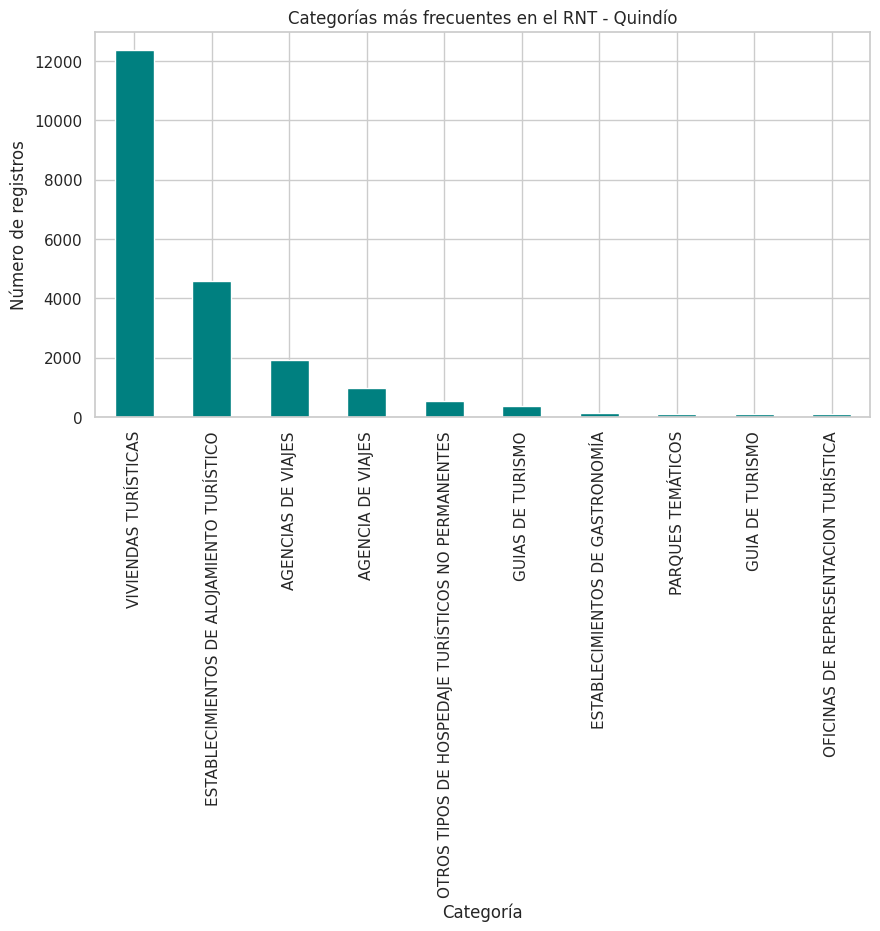

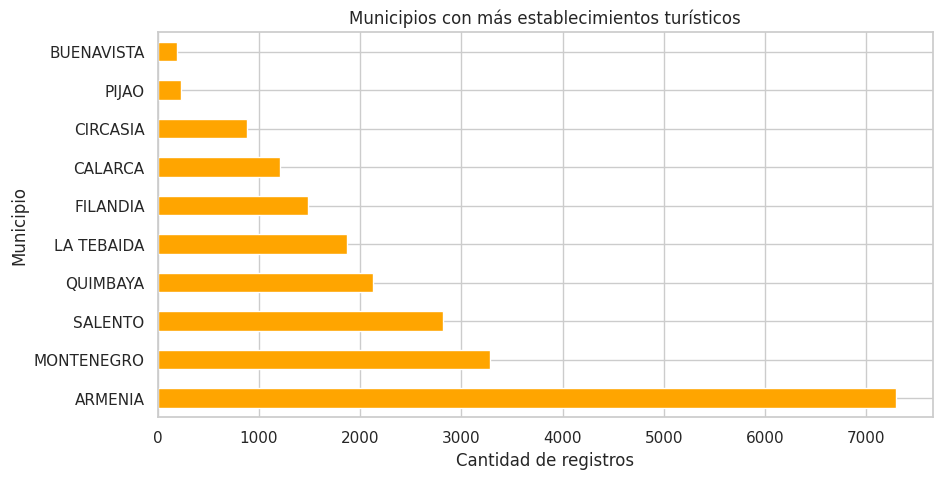

In [12]:
# 5. ANÁLISIS DESCRIPTIVO
# ============================================================

# Tipos de prestadores más comunes
plt.figure(figsize=(10,5))
df_filtrado_quindio["categoria"].value_counts().head(10).plot(kind="bar", color="teal")
plt.title("Categorías más frecuentes en el RNT - Quindío")
plt.xlabel("Categoría")
plt.ylabel("Número de registros")
plt.show()

# Municipios con más registros
plt.figure(figsize=(10,5))
df_filtrado_quindio["municipio"].value_counts().head(10).plot(kind="barh", color="orange")
plt.title("Municipios con más establecimientos turísticos")
plt.xlabel("Cantidad de registros")
plt.ylabel("Municipio")
plt.show()

In [13]:
# 6. MODELO DE RECOMENDACIÓN SIMPLE
# ============================================================

# Seleccionar columnas relevantes
cols = ["categoria", "municipio", "razon_social"]

# Crear matriz de características codificadas
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df_filtrado_quindio["info"] = df_filtrado_quindio["categoria"].astype(str) + " " + df_filtrado_quindio["municipio"].astype(str)
vectorizer = CountVectorizer()
matriz = vectorizer.fit_transform(df_filtrado_quindio["info"])

# Calcular similitud
similaridad = cosine_similarity(matriz, matriz)

# Función de recomendación
def recomendar_establecimientos(nombre, n=5):
    try:
        idx = df_filtrado_quindio[df_filtrado_quindio["razon_social"].str.contains(nombre, case=False, na=False)].index[0]
        scores = list(enumerate(similaridad[idx]))
        scores = sorted(scores, key=lambda x: x[1], reverse=True)
        indices = [i[0] for i in scores[1:n+1]]
        recomendados = df_filtrado_quindio.iloc[indices][["razon_social", "categoria", "municipio"]]
        return recomendados
    except IndexError:
        return "No se encontró el establecimiento."

/tmp/ipython-input-3427518870.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_quindio["info"] = df_filtrado_quindio["categoria"].astype(str) + " " + df_filtrado_quindio["municipio"].astype(str)


In [14]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 106.3 MB/s eta 0:00:00


In [15]:
#7. INTERFAZ STREAMLIT (EJECUTAR CON: streamlit run ProyectoRNT.py)
# ============================================================
import streamlit as st
def app_streamlit():
    st.title("🌴 Recomendador Turístico - Quindío")
    st.markdown("Sistema de recomendación basado en el Registro Nacional de Turismo (RNT)")

    nombre = st.text_input("Ingrese el nombre o parte del nombre del establecimiento:")
    n = st.slider("Número de recomendaciones", 1, 10, 5)

    if st.button("Recomendar"):
        resultado = recomendar_establecimientos(nombre, n)
        if isinstance(resultado, str):
            st.warning(resultado)
        else:
            st.dataframe(resultado)

    st.markdown("---")
    st.write("*Total de registros analizados:*", len(df_filtrado_quindio))
    st.bar_chart(df_filtrado_quindio["municipio"].value_counts())

# Descomentar la siguiente línea para ejecutar localmente
app_streamlit()

2025-11-07 15:18:39.220 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-07 15:18:39.547 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-07 15:18:39.549 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-07 15:18:39.550 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-07 15:18:39.551 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-07 15:18:39.552 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-07 15:18:39.554 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-07 15:18:39.555 Thread 'MainThread': mi

In [16]:
# 8. CONCLUSIONES AUTOMÁTICAS
# ============================================================

print("🏁 Conclusiones:")
print("- Se analizaron", len(df_filtrado_quindio), "registros del RNT correspondientes al departamento del Quindío.")
print("- Los municipios con más registros son:", ", ".join(df_filtrado_quindio['municipio'].value_counts().head(3).index))
print("- El sistema de recomendación usa similitud de texto entre categoría y municipio.")
print("- Puede servir como herramienta inicial para orientar turistas y analizar la oferta del sector.")

🏁 Conclusiones:
- Se analizaron 21567 registros del RNT correspondientes al departamento del Quindío.
- Los municipios con más registros son: ARMENIA, MONTENEGRO, SALENTO
- El sistema de recomendación usa similitud de texto entre categoría y municipio.
- Puede servir como herramienta inicial para orientar turistas y analizar la oferta del sector.
